In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import statistics
from scipy.stats import norm
from scipy.stats import chi2_contingency
from scipy.stats import chi2

In [4]:
#Monte Carlo Simulation
mean = 7.5 #Excess return
std = 19

sampling_statistics = pd.DataFrame(index = range(300), columns = ['Mean', 'Variance', 'Std. Dev.', 'Sharpe Ratio'])
for i in range(300):
    sample = np.random.normal(mean, std, 10)
    sampling_statistics.loc[i, 'Mean'] = sample.mean()
    sampling_statistics.loc[i, 'Variance'] = sample.var()
    sampling_statistics.loc[i, 'Std. Dev.'] = sample.std()
    sampling_statistics.loc[i, 'Sharpe Ratio'] = sampling_statistics.loc[i, 'Mean']/sampling_statistics.loc[i, 'Std. Dev.']
    
sampling_statistics.head()

,Mean,Variance,Std. Dev.,Sharpe Ratio
0,9.17727,603.332,24.5628,0.373625
1,-0.931974,428.586,20.7023,-0.0450179
2,5.83802,386.379,19.6565,0.297002
3,7.35922,367.684,19.1751,0.38379
4,-4.88223,300.021,17.3211,-0.281866


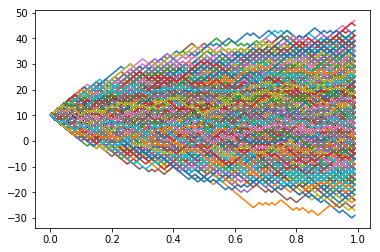

In [5]:
#Random walk simulation
import random
def positive_or_negative():
    return 1 if random.random() < 0.5 else -1

N = 10000 #Number of simulations
Z = [[]] * N
for j in range(N):
    T = 1 #Time length
    h = 0.01 #Time step size 
    steps = int(T/h) #Number of steps
    S_0 = 10 #Initial underlying price
    t = [k * h for k in range(steps)]
    S = [S_0]*steps #Time series

    for i in range(steps - 1):
        delta = positive_or_negative()
        S[i + 1] = S[i] + delta
    Z[j] = S
    plt.plot(t, Z[j])

(array([ 1.,  4., 13.,  0., 23., 25.,  0., 19., 11.,  4.]),
 array([ 3. ,  3.7,  4.4,  5.1,  5.8,  6.5,  7.2,  7.9,  8.6,  9.3, 10. ]),
 <a list of 10 Patch objects>)

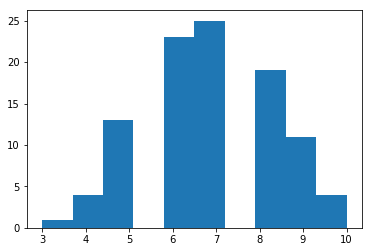

In [6]:
#Terminal value distribution
terminal_values = Z[:][-1]
plt.hist(terminal_values)

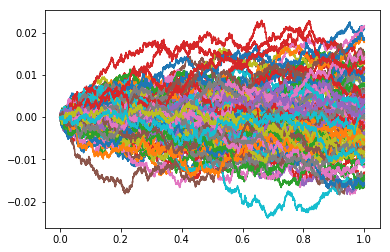

In [7]:
#Wiener process (continuous/non-differentiable)
W_0 = 0 #Initial value = 0
delta = np.random.normal(0, h)

N = 100 #Number of simulations
X = [[]] * N
for j in range(N):
    T = 1 #Time length
    h = 0.0001 #Time step size 
    steps = int(T/h) #Number of steps
    W_0 = 0 #Initial value = 0
    t = np.arange(0.0, T, h)
    W = [W_0]*steps #Time series

    for i in range(steps - 1):
        delta = np.random.normal(0, h)
        W[i + 1] = W[i] + delta
    X[j] = W
    plt.plot(t, X[j])

In [73]:
#Initial underlying price
S_0 = 100
#Strike price
K = S_0
#Risk-free rate
r = 0.05
#Volatility
sigma = 0.5
#Time to maturity
T = 1
#Black-Scholes-Merton Call Option Price
c = 21.79
#Number of simulations
N = 1
#Step
h = 0.01

In [74]:
S_1 = S_0 + h
Z = [[]] * N
Y = [[]] * N
X = [[]] * N
for i in range(0,N):
    d_1 = (math.log(S_0/K) + ((r+(sigma**2/2))*T))/(sigma * (T**0.5))
    d_2 = d_1 - sigma * ((T)**0.5)
    c_0 = S_0 * norm.cdf(d_1) - K*math.exp(-r*T)*norm.cdf(d_2)
    Z[i] = c_0
for i in range(0,N):
    d_1 = (math.log(S_1/K) + ((r+(sigma**2/2))*T))/(sigma * (T**0.5))
    d_2 = d_1 - sigma * ((T)**0.5)
    c_0 = S_1 * norm.cdf(d_1) - K*math.exp(-r*T)*norm.cdf(d_2)
    Y[i] = c_0
for i in range(0,N):
    X[i] = (Y[i] - Z[i])/0.01

In [75]:
#BSM Call Price 100
round(Z[0], 4)

21.7926

In [76]:
#BSM Call Price 100 + h
round(Y[0], 4)

21.799

In [77]:
#BSM Delta
round(X[0], 4)

0.6369

In [1]:
#Unit time interval
t = 1
#Number of paths
N = 1000
#Step size
S = 1/12
#Number of intervals
I = int(t/S) #12 intervals

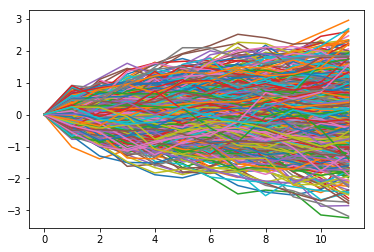

In [4]:
#Simulating Wiener process paths
Z = [[]] * N
t = list(range(0,I)) #Time from 0 to 11
for j in range(0, N):
    W = [0] * I
    for i in range(1,I):
        W[i] = np.random.normal(0, 1)*S**0.5 + W[i - 1]
    Z[j] = W
    plt.plot(t, Z[j])

In [6]:
terminal = [];
for row in Z:
    terminal.append(row[I-1])
sample_mean = sum(terminal)/len(terminal)
demeaned = []
demeaned[:] = [(x - sample_mean)**2 for x in terminal]
sample_variance = sum(demeaned)/len(demeaned)
print(sample_variance)
#Chi-square t-statistic
S2 = statistics.variance(terminal) #sample variance
print(S2)
sigma_sq = 1
chisq = (N - 1)*S2/sigma_sq
print(chisq)
# critical test-statistic
chi2_critical = chi2.ppf(0.95, 999)
print(chi2_critical)
print("Cannot reject the null at the 95% level")
#P-value
p_value = 1 - chi2.cdf(chisq, 999)
print(p_value)

0.9627673079429244
0.9637310389819074
962.7673079429254
1073.6426506574246
Cannot reject the null at the 95% level
0.7897761104025645
